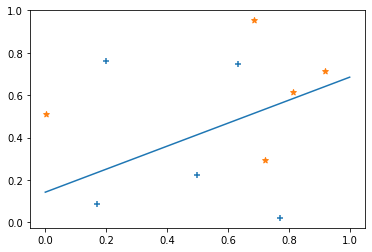

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10)

data_pos = np.random.rand(5, 2)
data_neg = np.random.rand(5, 2)

plt.scatter(data_pos[:,0],data_pos[:,1], marker='+')
plt.scatter(data_neg[:,0],data_neg[:,1], marker='*')

w1, b = np.random.rand(2)
linepoints_x = np.linspace(0, 1, 10)
plt.plot(linepoints_x, [w1 * x + b for x in  linepoints_x])

In [ ]:
#[x y 1][w1 -1 b]^T = w1x -y + b
#sigmoid(w1x -y + b) if (x,y) is positive
#(-1) log P(+|[x,y]+)
import math

def sigmoid(x):
  return 1/(1 + np.exp(-x))

sum_pos = 0
for x,y in data_pos:
  sum_pos += math.log(sigmoid(w1 * x - y + b))

# 1 - sigmoid(w1x -y + b) if (x,y) is negative
#(-1) log P(-|[x,y]-)
sum_neg = 0
for x,y in data_neg:
  sum_neg += math.log(1 - sigmoid(w1 * x - y + b))

sum = -1 * (sum_pos + sum_neg)
sum

6.679830781312231

In [ ]:
#we have to minimize it toward 0 ==> better line ==> change w1 and b
#gradient of sum ==> -1 * (sum_pos + sum_neg) over w1 and b
#for positives: gradient of math.log(sigmoid(w1 * x - y + b)) over w1 and b
#for negatives: gradient of math.log(1 - sigmoid(w1 * x - y + b)) over w1 and b

In [ ]:
#1) ro_sigmoid_ro_x = sigmoid(x)(1-sigmoid(x))
#2) ro_ln_ro_x = 1/x
#3) f(g(x)) = f'(g(x)) * g'(x)
#=> 1/sig * (sig * (1-sig)) * x over w1
#=> 1/sig * (sig * (1-sig)) * 1 over b
#w1 = w1 - avg(gradient) over w1
#b = b - avg(gradient) over b

In [ ]:
g_w1 = g_b = 0
for x, y in data_pos:
  g_w1 += (1 / sigmoid(w1 * x - y + b)) * (sigmoid(w1 * x - y + b) * (1-sigmoid(w1 * x - y + b))) * x
  g_b = (1 / sigmoid(w1 * x - y + b)) * (sigmoid(w1 * x - y + b) * (1-sigmoid(w1 * x - y + b))) * 1
g_w1 = g_w1 / len(data_pos)
g_b = g_b / len(data_pos)

print(g_w1, g_b)

0.23784991120410268 0.09916777219123385


In [ ]:
w1_old, b_old = w1, b
w1 -= g_w1
b -= g_b

sum_pos = 0
for x,y in data_pos:
  sum_pos += math.log(sigmoid(w1 * x - y + b))

# 1 - sigmoid(w1x -y + b) if (x,y) is negative
#(-1) log P(-|[x,y]-)
sum_neg = 0
for x,y in data_neg:
  sum_neg += math.log(1 - sigmoid(w1 * x - y + b))

sum = -1 * (sum_pos + sum_neg)
print(sum)

6.757193221579739


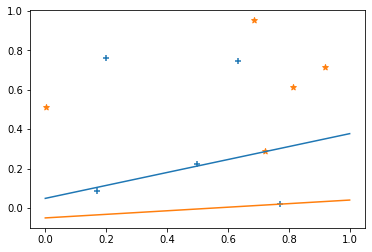

In [ ]:

plt.scatter(data_pos[:,0],data_pos[:,1], marker='+')
plt.scatter(data_neg[:,0],data_neg[:,1], marker='*')

linepoints_x = np.linspace(0, 1, 10)
plt.plot(linepoints_x, [w1_old * x + b_old for x in  linepoints_x])
plt.plot(linepoints_x, [w1 * x + b for x in  linepoints_x])

In [ ]:
import numpy as np
print(np.zeros([5,2]))
print(np.ones([6,2]))
[x, y] = (2, 1)
[w1, w2] = (3, 1)
f_x = w1 * x + w2


ro_e_ro_w1 = x
ro_e_ro_w2 = 1

lr = 0.1
e = float('inf') 
while(e > 0.001):
  e = abs(w1 * x + w2 - y)
  print(f'y = {w1 * x + w2}; error = {e}')
  w1 = w1 - lr * (ro_e_ro_w1)
  w2 = w2 - lr * (ro_e_ro_w2)

print(w1)
print(w2)
  
  
f_x = 0.39 * x - 0.29

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
y = 7; error = 6
y = 6.5; error = 5.5
y = 5.999999999999999; error = 4.999999999999999
y = 5.499999999999999; error = 4.499999999999999
y = 4.999999999999998; error = 3.9999999999999982
y = 4.499999999999999; error = 3.499999999999999
y = 3.999999999999999; error = 2.999999999999999
y = 3.499999999999999; error = 2.499999999999999
y = 2.999999999999999; error = 1.9999999999999991
y = 2.499999999999999; error = 1.4999999999999991
y = 1.9999999999999993; error = 0.9999999999999993
y = 1.4999999999999993; error = 0.49999999999999933
y = 0.9999999999999994; error = 5.551115123125783e-16
0.39999999999999963
-0.2999999999999999
